In [9]:
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')

%matplotlib inline
sns.set(style='white', rc={'figure.figsize':(12,8)})

Sklearn $\ge$ 0.19 is necessary for the efficient implementation of tsne.

In [15]:
import sklearn.manifold  
sklearn.__version__

'0.19.0'

First we'll get the data using git clone.  For those of you on systems that can't make command line calls you'll have to pull the repo via some alternate means.

We'll add a getTheData boolean so that if you've already run the notebook then you won't accidently clone it a second time.

In [1]:
getTheData = False
if getTheData:
    !git clone https://github.com/zalandoresearch/fashion-mnist.git

Cloning into 'fashion-mnist'...
remote: Counting objects: 486, done.
remote: Total 486 (delta 0), reused 0 (delta 0), pack-reused 486
Receiving objects: 100% (486/486), 104.13 MiB | 2.63 MiB/s, done.
Resolving deltas: 100% (273/273), done.
Checking connectivity... done.


Now we jump into the directory you've just created via the clone command above.  If you pulled the repository in another way feel free to swap the 'fashion-mnist' path below for the appropriate one on your system.

In [2]:
import os
os.chdir('fashion-mnist/')

In [3]:
%matplotlib inline
import utils.mnist_reader as mnist_reader #Why we needed to change direcotry
import numpy as np
import matplotlib.pyplot as plt

train, train_labels = mnist_reader.load_mnist('data/fashion', kind='train')
test, test_labels = mnist_reader.load_mnist('data/fashion', kind='t10k')
data = np.array(np.vstack([train, test]), dtype=np.float64) / 255.0
target = np.array(np.hstack([train_labels, test_labels]))

In [4]:
import umap

In [5]:
%%time
embedding = umap.UMAP(n_neighbors=5, metric='euclidean', random_state=42, min_dist=0.1).fit_transform(data)

CPU times: user 1min 47s, sys: 3.16 s, total: 1min 50s
Wall time: 1min 37s


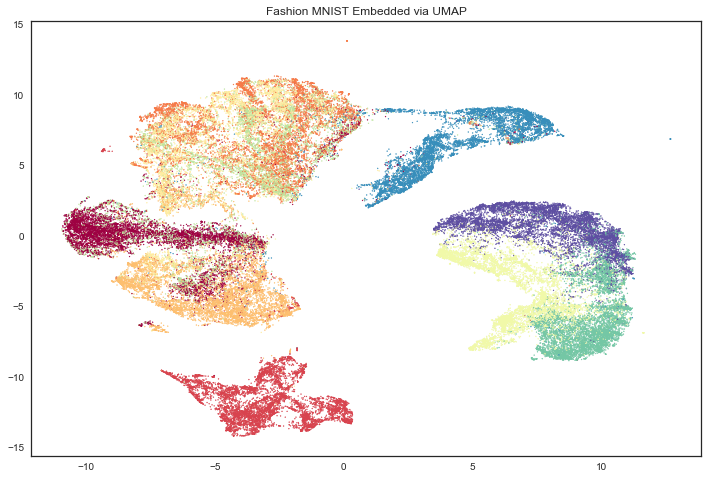

In [13]:
plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap="Spectral", s=1)
plt.title('Fashion MNIST Embedded via UMAP');

### T-SNE

In [16]:
fit_tsne = sklearn.manifold.TSNE()
%time u_tsne = fit_tsne.fit_transform(data)

CPU times: user 1h 50min 51s, sys: 2min 23s, total: 1h 53min 15s
Wall time: 1h 50min 7s


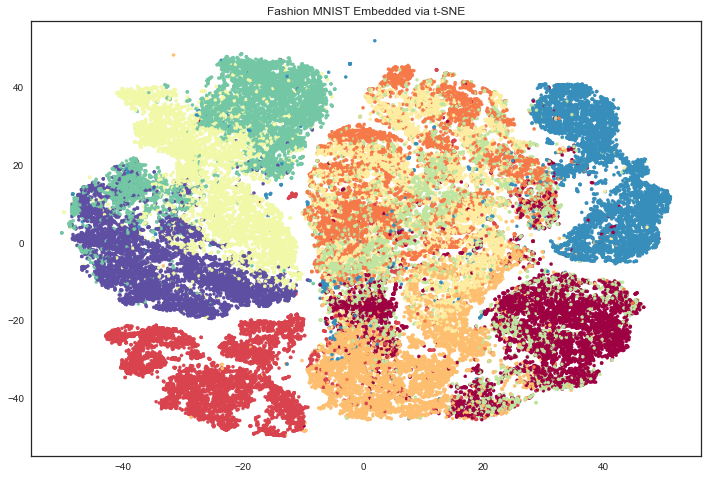

In [18]:
plt.scatter(u_tsne[:,0], u_tsne[:,1], c=target, cmap="Spectral", s=10)
plt.title('Fashion MNIST Embedded via t-SNE');